# **Health Insurance Cross Sell Prediction**

## **Import libraries and modules**

In [30]:
from modules.utils import Utils
from modules.categorical_analyses import CategoricalAnalyses
from modules.numerical_analyses import NumericalAnalyses
from modules.feature_engineering import FeatureEngineering
from modules.feature_selection import FeatureSelection
from modules.augmentation import Augmentation
from modules.modeling import Modeling

import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split

## **Collect data**

The test dataset doesn't have the target (`Response`) in it, so we can´t use it . <br><br>
We'll use the train dataset to split between train and test datasets!

In [3]:
# ToDo: Load DataFrame directly from GitHub Repo
# Load Train dataset
df_train_original = pd.read_csv(r"C:\Users\hugot\OneDrive\Ambiente de Trabalho\Projetos_DataScience\Hands_on_Projects\Health_Insurance_Cross_Sell_Prediction\dataset\dataset.csv")
df_train_original

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [4]:
df_train_original["id"].value_counts()

id
381109    1
1         1
2         1
3         1
4         1
         ..
10        1
9         1
8         1
7         1
6         1
Name: count, Length: 381109, dtype: int64

There are **no repeated ID's** in the train dataset, which means that we can split into train and test without concernings about clients' overlap in both datasets. <br>
Let's use `stratify` from `train_test_split` to ensure equal percentage of our target (`Response`) in both training and test datasets. 

In [17]:
df_train, df_test = train_test_split(df_train_original, test_size=0.20, random_state=42, stratify=df_train_original["Response"])



Let's see how many examples there are in train dataset, and the number of our target `Response` classes:

In [18]:
print(f"No. of training examples: {df_train.shape[0]}")
print(f'Training set has: \n {df_train["Response"].value_counts()}')
print(f"Training set % of positive Response: {(len(df_train[df_train["Response"] == 1]) /
                                               df_train.shape[0]) *
                                               100}")

print(f"\nNo. of testing examples: {df_test.shape[0]}")
print(f'Test set has: \n {df_test["Response"].value_counts()}')
print(f"Test set % of positive Response: {(len(df_test[df_test["Response"] == 1]) /
                                           df_test.shape[0]) *
                                           100}")

No. of training examples: 304887
Training set has: 
 Response
0    267519
1     37368
Name: count, dtype: int64
Training set % of positive Response: 12.256344153735647

No. of testing examples: 76222
Test set has: 
 Response
0    66880
1     9342
Name: count, dtype: int64
Test set % of positive Response: 12.256303954238934


## **Data Understanding**

Let's take a look at dataset's missing values and columns dtypes:

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


From the output above, it is possible to see that there are **no missing values** in the training dataset, having 3 different dtypes. <br><br>
We'll observe a statistical summary of the dataset numerical columns below:

In [20]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [21]:
# store numerical columns
num_cols = df_train.select_dtypes(include=['int', 'float']).columns.tolist()

The columns `Driving_License` and `Previously_Insured` are binary, indicating whether a client has driving license or if was previously insured in a past accident, respectively. <br><br>
Let's take a look at the categorical columns:

In [22]:
# store categorical columns
cat_cols = df_train.select_dtypes(include='object').columns.tolist()
cat_cols

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [23]:
df_train[cat_cols].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [24]:
print("Gender classes: ", df_train['Gender'].unique())
print("Vehicle Age classes: ", df_train['Vehicle_Age'].unique())
print("Vehicle Damage classes: ", df_train['Vehicle_Damage'].unique())

Gender classes:  ['Male' 'Female']
Vehicle Age classes:  ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle Damage classes:  ['Yes' 'No']


### Numerical Features Analysis

In [34]:
# instatiate NumericalAnalyses class for these analysis
num_analysis = NumericalAnalyses(df_train[num_cols])

In [35]:
num_cols

['id',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

Since `Driving_License`, `Previously_Insured`, and `Response` (our target) are binary variables, we'll observe their distributions jointly with the Categorical features. <br><br>
The `id ` column is not used for any of these explorations. 

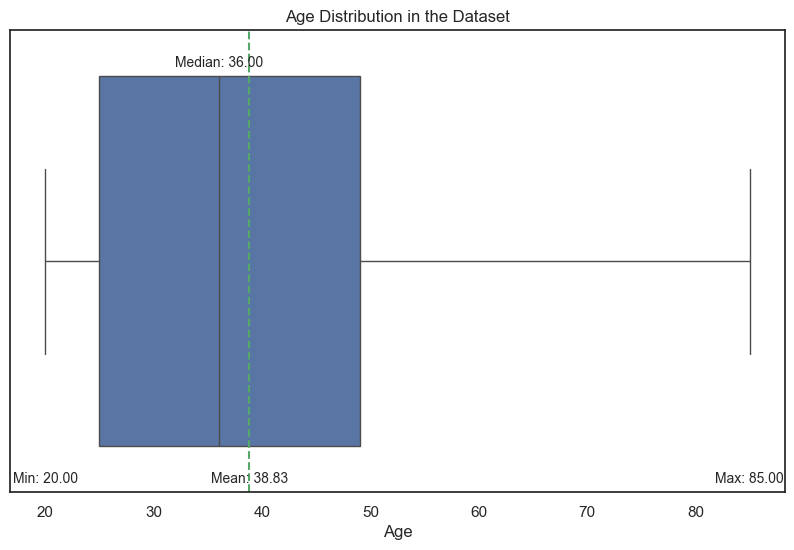

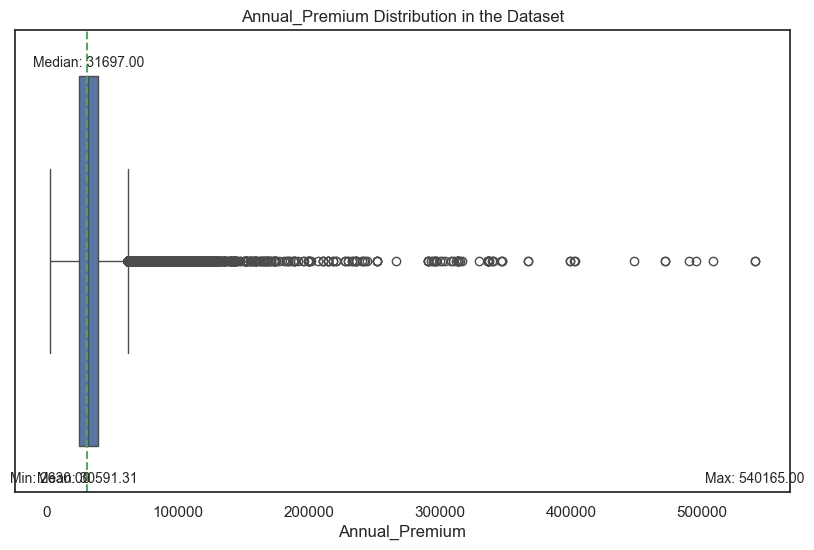

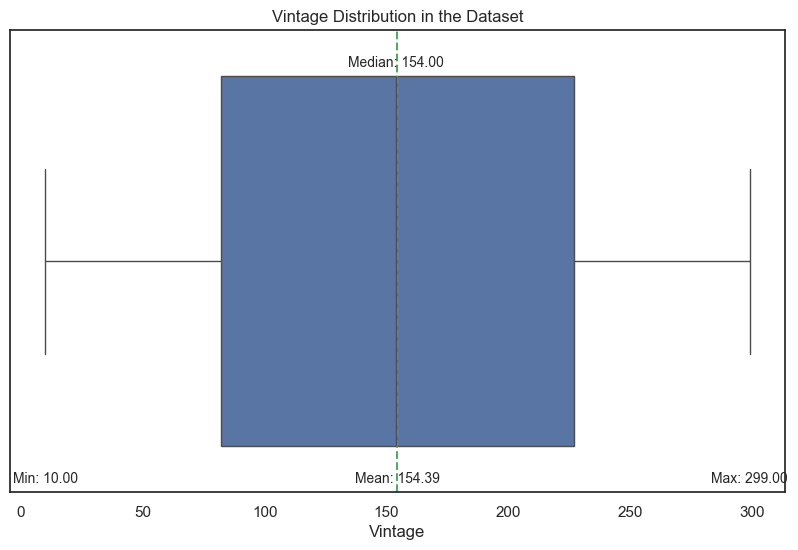

In [36]:
for col in ['Age', 'Annual_Premium', 'Vintage']:
    num_analysis.boxplots(col)

From the box plot's above, we can see that the variables `Age` and `Vintage` have distributions relatively symmetrical, with the `Age` varible having a slight right (positive) skewness (mean greater than median), indicating more client with higher ages. <br><br>
On the other hand, the `Annual_Premium` has higher number of outliers, reflecting the discrepancy in the premiums applied by each client. It needs to be further analyzed to process these outliers.    

The `Region_Code` and `Policy_Sales_Channel` will be explored through bar plots:

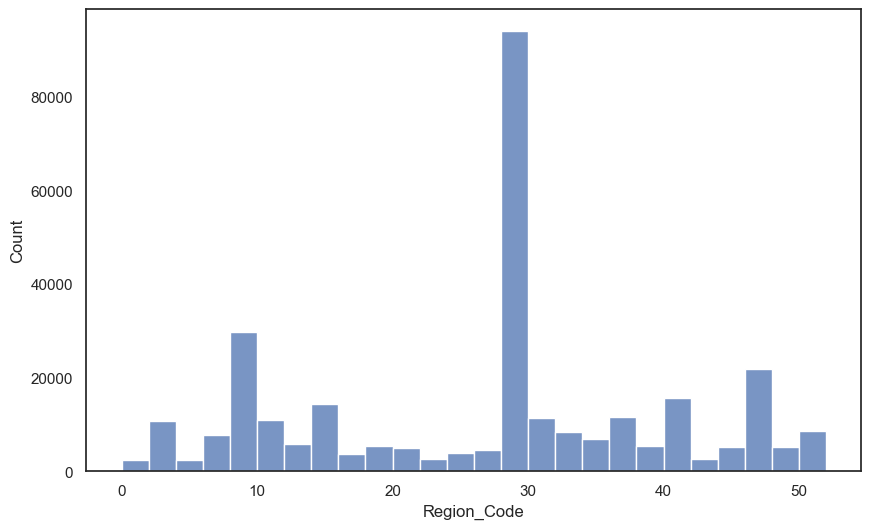

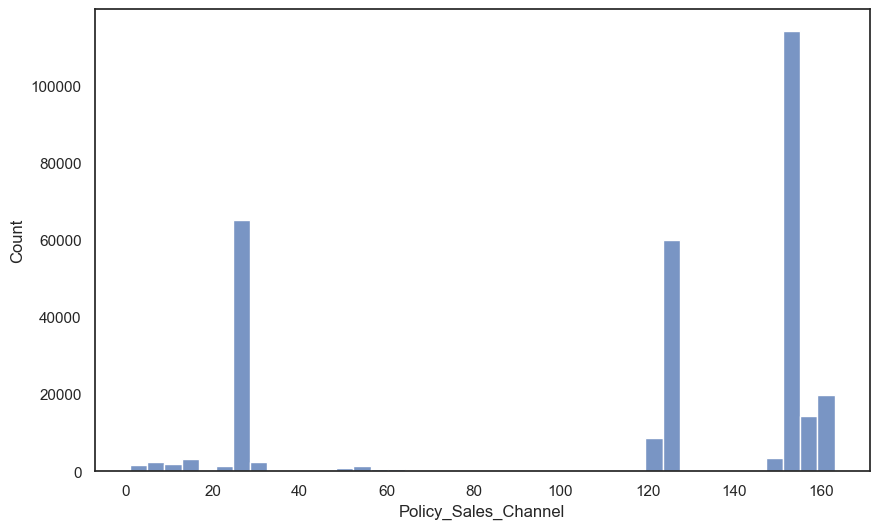

In [37]:
for col in ['Region_Code', 'Policy_Sales_Channel']:
    num_analysis.hist(col)

### Categorical Features Analysis

In [43]:
cat_analysis = CategoricalAnalyses(df_train)

In [51]:
cat_cols

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

Let's explore the distributions of the Categorical features above, along with the features that are not as `object` type in the DataFrame but are binary: `Driving_License`, `Previously_Insured`.

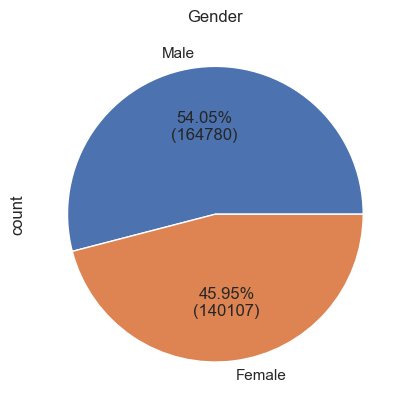

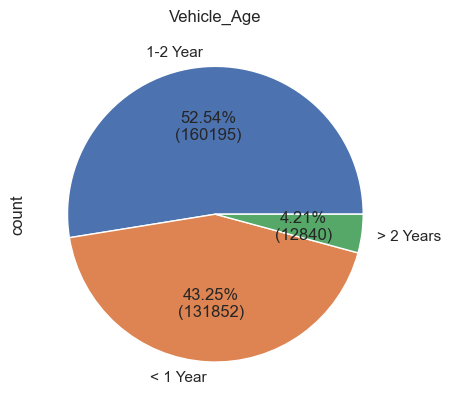

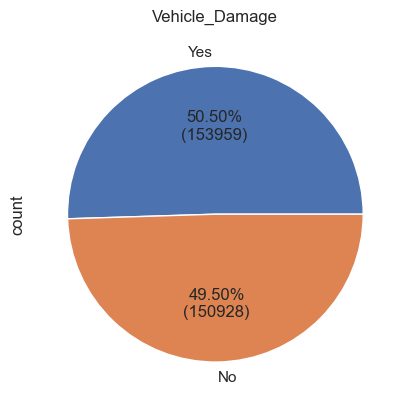

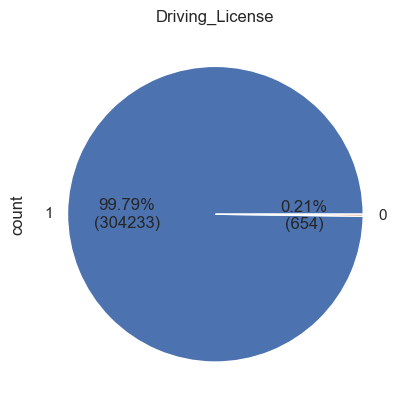

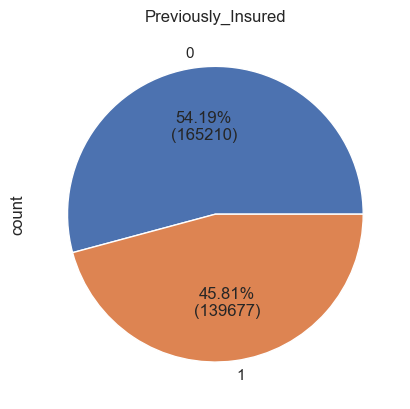

In [55]:
cat_analysis.pie(cat_cols + ["Driving_License", "Previously_Insured"])

From the pie charts above, can conclude:

- There are slightly more Males than Females;
- Approximately 96% of the health insured clients have a **car with or less than 2 years**;
- There's an equal proportion of clients who have suffered an accident and those who have not;
- Only 0.21% of the clients **do not possess driving license**;
- There are slightly more clients that have been previously insured than those who have never been.

## **Data Exploration**